In [8]:
from model import *
from train_test_split import *
from predictionsGraph import *
from data_set import *
from torch.utils.data import DataLoader

In [12]:
seq_len = 3 #ovdje treba biti ista vrijednost kao kad se treniralo
batch_size = 1 #
train_data, val_data, test_data = load_data('real_for_all_podaci.csv') 
input_dim = train_data.shape[1]
test_dataset = Dataset(test_data, seq_len)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)
train_dataset = Dataset(train_data, seq_len)
train_loader = DataLoader(train_dataset, shuffle=False, batch_size=batch_size)
model = Net(input_dim,  hidden_dim = 1028, drop_prob = 0)

In [13]:
path_to_model = 'models/epoch_84-batch_size_128-lr_0.0001-hidd_dim_1028.weights'
model.load_state_dict(torch.load(path_to_model))
model.eval()

Net(
  (lstm): LSTM(7, 1028, batch_first=True)
  (fc1): Linear(in_features=1028, out_features=1028, bias=True)
  (fc): Linear(in_features=1028, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0, inplace=False)
)

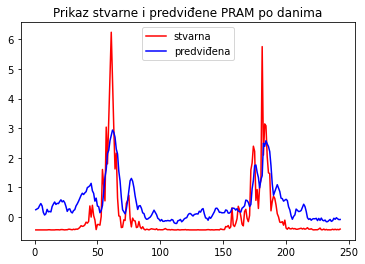

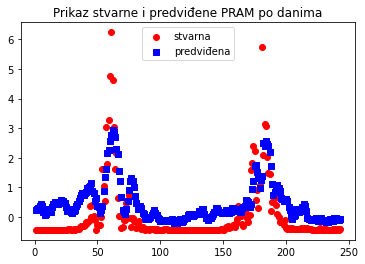

In [15]:
realValues = []
predictedValues = []
#h = model.lstm.weight_ih_l0
h = model.init_hidden(batch_size)

for (inputs, labels) in test_loader:
    inputs, labels = inputs, labels 
    output = model(inputs)#, h)
    realValues.append(labels.item())
    predictedValues.append(output.item())
    
predictionsGraph(realValues, predictedValues)
predictionsGraphScatter(realValues, predictedValues)

In [12]:
predictedValues

[-0.021305851638317108,
 -0.020829834043979645,
 -0.02089638262987137,
 -0.020686842501163483,
 -0.02091071754693985,
 -0.020844869315624237,
 -0.02057761698961258,
 -0.020768500864505768,
 -0.020554430782794952,
 -0.020359955728054047,
 -0.020594380795955658,
 -0.02008245140314102,
 -0.01969423145055771,
 -0.01985948532819748,
 -0.019780181348323822,
 -0.019448988139629364,
 -0.019131384789943695,
 -0.018932364881038666,
 -0.018809102475643158,
 -0.01850401610136032,
 -0.018404148519039154,
 -0.018392018973827362,
 -0.018084518611431122,
 -0.017787955701351166,
 -0.01770126074552536,
 -0.017956607043743134,
 -0.017940126359462738,
 -0.017788387835025787,
 -0.01767384260892868,
 -0.01714194566011429,
 -0.01672380417585373,
 -0.016476117074489594,
 -0.01623424142599106,
 -0.016087479889392853,
 -0.016009189188480377,
 -0.01575096696615219,
 -0.015715233981609344,
 -0.015423528850078583,
 -0.015074081718921661,
 -0.014805532991886139,
 -0.014587752521038055,
 -0.014381207525730133,
 -0.0